# Evaluation of Aircraft Risk Profiles.


### Data source:
This data was downloaded from [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?resource=download)

## Introduction
The choice of aircrafts significantly impacts the overrall safety, efficiency and profitability of a business. As the aviation industry is usually subject to unpredictable market conditions and mantainance challenges, understanding which aircrafts present lower risk is essential.

This analysis will assess various incidents that have occured in the past.The goal is to identify aircrafts that offer the least risk profile for the new aviation venture, while ensuring financial sustainabiity.


## 1. Business Understanding
Operating aircrafts for commercial and private enterprices may be subject to risks involved in operating aircrafts. This analysis will venture deep in all the possible negative outcomes and provide the company with recommendations for a smoother running of the business.

## Research Questions
* What has been the trend of plane crashes over the years
* What is the state with the most plane crashes
* What is the severity of injury and survival ratio of a plane crash
* what make of a plane in most prone to accidents   

## Objectives
* To evaluate the trends of plane crashes over the past years
* To identify the state wih the most pane crashes
* To evaluate chances of survival after a plane crash
* To find out which model of aircrafts is most likely to get into an accident

## Data Understanding
For this research, we collected data from kaggle which contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

Each record (row) from this dataset represents information about a certain plane accident incident.

Each column contains a different type of data related to that incident. Some of the columns are illustrated below:
* Event.Date : The date when that accident occurred
* Location : The state where that accident happened
* Airport.Name :The name of the airport where the affected plane took off from
* Injury.Severity: How severe were the injuries from the plane crash
* Make: The type of aircraft
* NUmber.Of.Engines : THe number of engines in the plane


### Import the required libraries 

In [50]:
#Importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset and exploration 

In [51]:
df = pd.read_csv("AviationData.csv", encoding= 'latin1',low_memory=False)
#Checks the first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [52]:
#This code gives the description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We have succesfully loaded the dataset and viewed its contents. we learn that there are 31 columns. There are 2 datatypes: float and objects(string)

## Data cleaning


We are counting the appearance of nan values in the `Total.Serious.Injuries` column

In [53]:
print(df["Total.Serious.Injuries"].isna().sum())


12510


The number is significantly huge and might affect the data, so we might as well work with it that way.

In [54]:
type(df["Event.Date"])

pandas.core.series.Series

As we can see, the event date is a pandas series. we can change that to a date by using the pd.to_datetime formula.

In [55]:
df["Event.Date"]= pd.to_datetime(df["Event.Date"])

In [56]:
print(df["Event.Date"].isna().sum())

0


There are no missing value in the event date column.

## Beginning of analysis

## i. Evaluate the trends of plane crashes over the years


In [57]:
df["Event.Year"]= df["Event.Date"].dt.year

In [58]:
df["Event.Year"]

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: Event.Year, Length: 88889, dtype: int64

We are visualizing the trends of plane crashes over the years

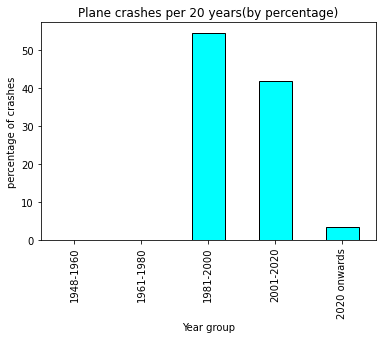

In [59]:
#Create bins for easy understanding
bins=[1940,1960,1980,2000,2020,2022]
labels=['1948-1960','1961-1980','1981-2000','2001-2020','2020 onwards']
#Create a new "year group" column based on the bins we have created
df["Year group"] = pd.cut(df["Event.Year"], bins=bins, labels=labels,right=False)
#We group the years in groups of 20 years
crashes_per_20yrs = df.groupby("Year group").size()
#now we change the accidents into percentages for easy understanding
crashes_percentage= crashes_per_20yrs/crashes_per_20yrs.sum()*100

#Count the number of crashes per year and assign them to plane_crashes_pyr
crashes_percentage.plot(kind="bar", color="cyan",edgecolor="black")
#set the title and x and y labels
plt.title("Plane crashes per 20 years(by percentage)")
plt.xlabel("Year group")
plt.ylabel("percentage of crashes")
plt.show()

## ii. Identify the state with the most plane crashes

In [60]:
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Year group
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,1948-1960
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,1961-1980
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,1961-1980
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,1961-1980
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,1961-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,NaN


In [61]:
#Find the total number of unique locations
unique_location_count = df["Location"].nunique()
unique_location_count 

27758

In [62]:
#find the most common locations
unique_locations = df["Location"].value_counts()
unique_locations

ANCHORAGE, AK                434
MIAMI, FL                    200
ALBUQUERQUE, NM              196
HOUSTON, TX                  193
CHICAGO, IL                  184
                            ... 
Hong Kong, United Kingdom      1
JEFFERSON, OK                  1
Centerville, UT                1
Midland, LA                    1
BRACEVILLE, IL                 1
Name: Location, Length: 27758, dtype: int64

In [63]:
top_5_most_unique = unique_locations.head(5)
top_5_most_unique

ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: Location, dtype: int64

We have found that the top 5 most common locations for accidents is Anchorage, AK, leading with 434 incidents, then Miami,Albuquerque,NM, then Houston, then Chicago.

### iii. To evaluate chances of survival after a plane crash

In [64]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Event.Year', 'Year group'],
      dtype='object')

In [65]:
#We are using the Total.Serious.Injuries, Total.Fatal.Injuries, Total.Minor.injuries,Total.Uninjured  to calculate the total number of passengers in the plane
df["Total_passengers"] = (df["Total.Uninjured"]+df["Total.Serious.Injuries"]+df["Total.Minor.Injuries"]+df["Total.Fatal.Injuries"])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Year group,Total_passengers
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,1948-1960,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,1961-1980,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,1961-1980,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,1961-1980,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,1961-1980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,NaN,1.0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,NaN,0.0
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,NaN,1.0
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,NaN,0.0


In [66]:
df["Survival_rate"] = (df["Total.Uninjured"]+df["Total.Serious.Injuries"]+df["Total.Minor.Injuries"]/ df["Total_passengers"])

In [67]:
#Lets show survival rate per year
print(df[["Event.Year","Survival_rate"]])

       Event.Year  Survival_rate
0            1948            0.0
1            1962            0.0
2            1974            NaN
3            1977            0.0
4            1979            NaN
...           ...            ...
88884        2022            1.0
88885        2022            NaN
88886        2022            1.0
88887        2022            NaN
88888        2022            2.0

[88889 rows x 2 columns]


In [69]:
#calculate the average survival rate for each year
average_survival_by_yr = df.groupby("Event.Year")["Survival_rate"].mean()

In [76]:
highest_survival_yr = average_survival_by_yr.idxmax()
highest_survival_yr

2005

2005 registered the highest survival rate for a plane crash.

### iv. To evaluate which make of a plane is prone to accidents


In [86]:
# Lets find out how many makes there are in the dataset

makes= df["Make"].value_counts()topten
print(makes)

Cessna              22227
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
MCGRATH ROBERT F        1
LARRY KETTERLING        1
DOUGLAS BRIAN G         1
Allen-charles           1
Herman                  1
Name: Make, Length: 8237, dtype: int64


In [88]:
len(makes)

8237

In [92]:
#lets find the top most ffected by accidents
bottom_10_makes = makes.head(10)
bottom_10_makes

Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: Make, dtype: int64

### We want to create a bar chart to display the top ten usafe makes of airplanes based on the data

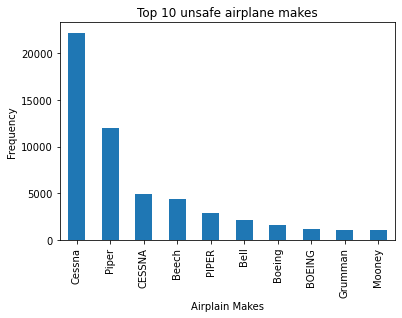

In [93]:


#Create a bar chart with x label y label and title.
bottom_10_makes.plot(kind="bar")

plt.title("Top 10 unsafe airplane makes")

plt.xlabel("Airplain Makes")

plt.ylabel("Frequency")

plt.show()

The Cessna is the most likely to get into an accident, thus the most unsafe make of airplanes

### Now lets see the top 10 safe makes of airplanes as of the data

In [94]:
top_10_makes= makes.tail(10)
top_10_makes


Mileski             1
Warner Aerocraft    1
Degelia             1
HOLM MICHAEL J      1
Murawski            1
MCGRATH ROBERT F    1
LARRY KETTERLING    1
DOUGLAS BRIAN G     1
Allen-charles       1
Herman              1
Name: Make, dtype: int64

### Mileski, WArner Aerocraft, Degelia, HOLM MICHAEL J, Murawski, MCGRATH ROBERT F, LARRY KETTERLING, DOUGHLAS BRIAN G,Allen-charles and Herman are the top 10 safest aircrafts.

## Findings
- Over the past years, plane crashes have reduced. THis may be attributed to the increasing safety measures that have been implemented over time.

- We have found that the top 5 most common locations for accidents is Anchorage, AK, leading with 434 incidents, then Miami,Albuquerque,NM, then Houston, then Chicago. The company should reduce investments in these states and invest in safer states

- Chances of survival after a plane crash are very low, as aviation accidents are almost 100% fatal. The losses incurred after these accidents are also very costly

- The Cessna is the most likely to get into an accident, thus the most unsafe make of airplanes. Investing into safer makes like Mileksi is advisable

## Recommendations
- It has been noted that older planes were more unsafe, and many safety features have been introduced just recently. For this reason, The company should buy newer planes for operations

- Avoid flying planes in the states listed as unsafe, and invest more on the safer states, to reduce the likely for an accident

- Aviation mistakes always turn out to big losses to a company. encourage accuracy in operations and sensitize workers on the same

- Invest on safer makes of airplanes, and avoid the unsafe ones, like the Cessnar. It should however be noted that some planes may have higher occurances of accident due to their popularity. 

## Conclussion
This analysis provides us with insights about the business decission into venturing the aviation business. Accidents are said to be part of nature. It is not anyone's capability to control that. However we have calculated satistics to minimise the likelihood of such to happen. Avoiding older makes of planes is a good approach to avoiding the risks. Accuracy of employees and workers is also very crucial. Some states have been noted to be notorious for accidents. In conclussion, the aviation industry is becoming safer and profitable over time, and the business should concider investing in that industry.